### Question 1:  Review the Titanic data(60)

In lecture 3, we use Titanic data as the example for data pre-processing. This dataset contains information about passengers on the Titanic, including features like age, gender, class, and whether they survived or not. Now we are going to fit this data to the three classification models we have discussed. 

In [154]:
import pandas as pd
import seaborn as sns

# Load the Titanic dataset
titanic_data = sns.load_dataset('titanic')



In [155]:
titanic_data=pd.DataFrame(titanic_data)

In [156]:
titanic_data.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

1. Perform the pre-processing steps we have done in the lecture 3, including cleaning the missing values, convert the target (survived) to a categorical variable and split the training and testing data. (10)

In [157]:

rows_with_missing_values = titanic_data[titanic_data.isnull().any(axis=1)]

print(rows_with_missing_values)

     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
2           1       3  female  26.0      0      0   7.9250        S   Third   
4           0       3    male  35.0      0      0   8.0500        S   Third   
5           0       3    male   NaN      0      0   8.4583        Q   Third   
7           0       3    male   2.0      3      1  21.0750        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
884         0       3    male  25.0      0      0   7.0500        S   Third   
885         0       3  female  39.0      0      5  29.1250        Q   Third   
886         0       2    male  27.0      0      0  13.0000        S  Second   
888         0       3  female   NaN      1      2  23.4500        S   Third   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alo

In [158]:
titanic_data.shape

(891, 15)

In [159]:
titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [160]:
titanic_data.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [161]:

mean_age = titanic_data['age'].mean()

titanic_data['age'].fillna(mean_age, inplace=True)

titanic_data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [162]:

titanic_data['deck'] = titanic_data['deck'].astype(str)


titanic_data['deck'] = titanic_data['deck'].replace('nan', 'Unknown')

titanic_data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,Unknown,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,Unknown,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,Unknown,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,Unknown,Southampton,no,True
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,Unknown,Southampton,no,False
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [163]:

titanic_data = titanic_data.dropna()

titanic_data.shape

(889, 15)

In [164]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features (X) and target variable (y)
X = titanic_data.drop('survived', axis=1)
y = titanic_data['survived'].astype('category')

# Select only the numeric columns for scaling
numeric_columns = ['age', 'fare']
numeric_data = titanic_data[numeric_columns]

# Scale the numeric data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Split the data into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.2, random_state=4200)

In [165]:
y_train.dtype

CategoricalDtype(categories=[0, 1], ordered=False)

In [166]:
y_train

824    0
380    1
637    0
356    1
191    0
      ..
270    0
463    0
340    1
757    0
164    0
Name: survived, Length: 711, dtype: category
Categories (2, int64): [0, 1]

2. Now only use the age and fare as the features, fit Naive bayes, LDA and QDA model. Report the classification table for each model. Which one performs the best? (20) 

In [167]:
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Fit Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Fit LDA model
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)

# Fit QDA model
qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_train, y_train)

# Compare accuracies
nb_accuracy = nb_model.score(X_test, y_test)
lda_accuracy = lda_model.score(X_test, y_test)
qda_accuracy = qda_model.score(X_test, y_test)

print("Naive Bayes accuracy: ", nb_accuracy)
print("LDA accuracy: ", lda_accuracy)
print("QDA accuracy: ", qda_accuracy)

Naive Bayes accuracy:  0.6235955056179775
LDA accuracy:  0.6235955056179775
QDA accuracy:  0.6123595505617978


In [168]:
from sklearn.metrics import classification_report

nb_predictions = nb_model.predict(X_test)
report = classification_report(y_test, nb_predictions)#no need to specify column name if it already convereted into a categorical column
                               
print("Classification Report:\n", report)

lda_predictions = lda_model.predict(X_test)
report = classification_report(y_test, lda_predictions) 
                               
print("Classification Report:\n", report)

qda_predictions = nb_model.predict(X_test)
report = classification_report(y_test, qda_predictions)
                             
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.93      0.75       107
           1       0.60      0.17      0.26        71

    accuracy                           0.62       178
   macro avg       0.61      0.55      0.51       178
weighted avg       0.62      0.62      0.55       178

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.93      0.75       107
           1       0.61      0.15      0.25        71

    accuracy                           0.62       178
   macro avg       0.62      0.54      0.50       178
weighted avg       0.62      0.62      0.55       178

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.93      0.75       107
           1       0.60      0.17      0.26        71

    accuracy                           0.62       178
   macro avg       0.61      0.55      0.51       178
we

We observe that Naive Bayes and LDA perform similaly, where as QDA comparatively doesn't perform as great..

3. Make a data visualization to show the decision boundary for three models. (10)

In [169]:
X["fare"].describe()

count    889.000000
mean      32.096681
std       49.697504
min        0.000000
25%        7.895800
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

In [170]:
 X["age"].describe()

count    889.000000
mean      29.653446
std       12.968366
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: age, dtype: float64

4. Now fit the models again with all variables. Make sure you have convert the categorical variables to factors. Report the classification table for each models. Which one performs the best? (20)

In [171]:
X.dtypes

pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck             object
embark_town      object
alive            object
alone              bool
dtype: object

In [172]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
import pandas as pd
categorical=['pclass','sibsp','parch','embarked','sex','class', 'who','adult_male','alive','alone']
numeric = ['age','fare']
df_en=pd.get_dummies(titanic_data, columns=categorical)




In [173]:
y=df_en['survived']

In [174]:
df_en.shape

(889, 39)

In [175]:
df_en=df_en.drop(columns=['deck','embark_town','survived'])

We drop down deck as most of the values were unknown and this does not influence our model, similarly for embark town, this feature's relevance seems comparatively less significant.

In [176]:
scaler = StandardScaler()
df_en_numeric = pd.DataFrame(scaler.fit_transform(df_en[numeric]),columns=['age','fare'])

In [177]:
df_en_numeric.shape

(889, 2)

In [178]:
df_en.shape

(889, 36)

In [179]:
df_en=df_en.drop(columns=['age','fare'])

In [180]:
df_en.shape

(889, 34)

In [181]:
df_en_numeric.shape

(889, 2)

In [182]:
df_en = df_en.reset_index(drop=True)
df_en_numeric = df_en_numeric.reset_index(drop=True)

# Concatenate the two DataFrames vertically
df_en = pd.concat([df_en, df_en_numeric], axis=1)

In [183]:
df_en.shape

(889, 36)

In [184]:
X = df_en 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [185]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)




(711, 36)
(711,)
(178, 36)
(178,)


In [186]:
X_train.columns

Index(['pclass_1', 'pclass_2', 'pclass_3', 'sibsp_0', 'sibsp_1', 'sibsp_2',
       'sibsp_3', 'sibsp_4', 'sibsp_5', 'sibsp_8', 'parch_0', 'parch_1',
       'parch_2', 'parch_3', 'parch_4', 'parch_5', 'parch_6', 'embarked_C',
       'embarked_Q', 'embarked_S', 'sex_female', 'sex_male', 'class_First',
       'class_Second', 'class_Third', 'who_child', 'who_man', 'who_woman',
       'adult_male_False', 'adult_male_True', 'alive_no', 'alive_yes',
       'alone_False', 'alone_True', 'age', 'fare'],
      dtype='object')

In [187]:
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Fit Naive Bayes model
nb_model1 = GaussianNB()
nb_model1.fit(X_train, y_train)

# Fit LDA model
lda_model1 = LinearDiscriminantAnalysis()
lda_model1.fit(X_train, y_train)

# Fit QDA model
qda_model1 = QuadraticDiscriminantAnalysis()
qda_model1.fit(X_train, y_train)

# Compare accuracies
nb_accuracy1 = nb_model1.score(X_test, y_test)
lda_accuracy1 = lda_model1.score(X_test, y_test)
qda_accuracy1= qda_model1.score(X_test, y_test)

print("Naive Bayes accuracy: ", nb_accuracy1)
print("LDA accuracy: ", lda_accuracy1)
print("QDA accuracy: ", qda_accuracy1)

Naive Bayes accuracy:  1.0
LDA accuracy:  0.8202247191011236
QDA accuracy:  1.0


In [188]:
import warnings
import numpy as np
warnings.filterwarnings('ignore')

# Create a meshgrid of points to plot the decision boundary
x_min, x_max = X["age"].min() - 0.5, X["age"].max() + 0.5
y_min, y_max = X["fare"].min() - 0.5, X["fare"].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max,0.1), np.arange(y_min, y_max, 10))

# Make predictions on the meshgrid points for each model
nb_pred = nb_model.predict(np.c_[xx.ravel(), yy.ravel()])
lda_pred = lda_model.predict(np.c_[xx.ravel(), yy.ravel()])
qda_pred = qda_model.predict(np.c_[xx.ravel(), yy.ravel()])

nb_pred = nb_pred.reshape(xx.shape)
lda_pred = lda_pred.reshape(xx.shape)
qda_pred = qda_pred.reshape(xx.shape)

In [189]:
from sklearn.metrics import classification_report

# Compare accuracies

nb_predictions = nb_model1.predict(X_test)
report = classification_report(y_test, nb_predictions)#no need to specify column name if it already convereted into a categorical column
                               
print("Classification Report:\n", report)

lda_predictions = lda_model1.predict(X_test)
report = classification_report(y_test, lda_predictions) 
                               
print("Classification Report:\n", report)

qda_predictions = nb_model1.predict(X_test)
report = classification_report(y_test, qda_predictions)
                             
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       109
           1       1.00      1.00      1.00        69

    accuracy                           1.00       178
   macro avg       1.00      1.00      1.00       178
weighted avg       1.00      1.00      1.00       178

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.84      0.85       109
           1       0.76      0.78      0.77        69

    accuracy                           0.82       178
   macro avg       0.81      0.81      0.81       178
weighted avg       0.82      0.82      0.82       178

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       109
           1       1.00      1.00      1.00        69

    accuracy                           1.00       178
   macro avg       1.00      1.00      1.00       178
we

Q3)Visualising the decision boundary for 3 models-LDA/QDA/Naive Bayes for Age vs Fare.

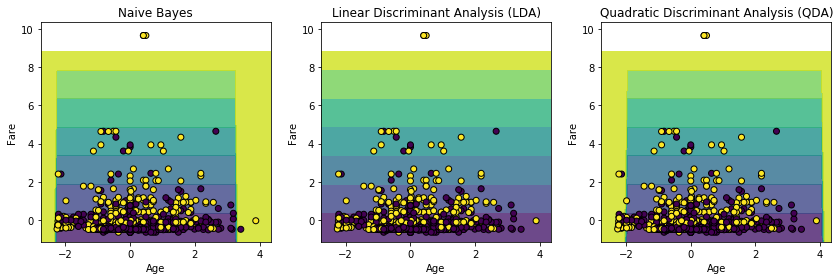

In [190]:

import matplotlib.pyplot as plt
# Plot the decision boundaries
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.contourf(xx, yy, nb_pred, alpha=0.8)
plt.scatter(X["age"], X["fare"], c=y, edgecolors='k')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Naive Bayes')

plt.subplot(1, 3, 2)
plt.contourf(xx, yy, lda_pred, alpha=0.8)
plt.scatter(X["age"], X["fare"], c=y, edgecolors='k')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Linear Discriminant Analysis (LDA)')

plt.subplot(1, 3, 3)
plt.contourf(xx, yy, qda_pred, alpha=0.8)
plt.scatter(X["age"], X["fare"], c=y, edgecolors='k')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Quadratic Discriminant Analysis (QDA)')

plt.tight_layout()
plt.show()

When considering all factors,Naive Bayes and QDA perform with an accuracy of 1 whereas QDA performs with 0.83 accuracy, hence NB and QDA are better.

### Question 2: Simulation study (40)

In the code demonstration, we show you how to implement a simulation study to show the effect of independence when fitting Naive bayes and LDA. Now, try to implement another simulation study so that it show the effect of noise when fitting Naive bayes, LDA and QDA. Show a plot between accuracy and noise level. 

Hint: The effect of noise can be considered as the randomness of classification. You can randomly change some of the labels. More labels you have change, more noises you are introduced to the data. Consider the function: np.random.choice 

In [191]:
import time
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification

# Set the random seed for reproducibility
np.random.seed(4400)

# Define the range of dataset sizes
noise = np.arange(0,60,10)

accuracy_nb = []
accuracy_lda = []
accuracy_qda = []
noise_per_nb = []
noise_per_lda = []
noise_per_qda = []

In [192]:
import numpy as np

def flip_labels_by_percentage(y, flip): 
    num_flips = int(len(y) * flip / 100)
    flip_indices = np.random.choice(len(y), num_flips, replace=False)
    flipped_labels = np.copy(y)
    flipped_labels[flip_indices] = 1 - flipped_labels[flip_indices]
    return flipped_labels

In [193]:
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

for cor in noise:
    
    X1 = np.random.normal(5, 1, 1000)
    X2 = np.random.normal(0, 1, 1000)
    X3 = np.random.normal(0, 1, 1000)
    X4 = np.random.normal(0, 1, 1000)
    X = pd.DataFrame({'X1': X1, 'X2': X2, 'X3': X3, 'X4': X4})
    y = result_vector = np.where(X1 > 5, 1, 0)
    y_flip=flip_labels_by_percentage(y, cor)
    
    

    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                        test_size=0.2, 
                                                        random_state=4400)

    nb_model = GaussianNB()
    nb_model.fit(X_train, y_train)
    accuracy_nb.append(nb_model.score(X_test, y_test))
    noise_per_nb.append(cor)

    lda_model = LinearDiscriminantAnalysis()
    lda_model.fit(X_train, y_train)
    accuracy_lda.append(lda_model.score(X_test, y_test))
    noise_per_lda.append(cor)
    
    
    qda = QuadraticDiscriminantAnalysis()
    qda.fit(X_train, y_train)
    accuracy_qda.append(qda.score(X_test, y_test))
    noise_per_qda.append(cor)
    

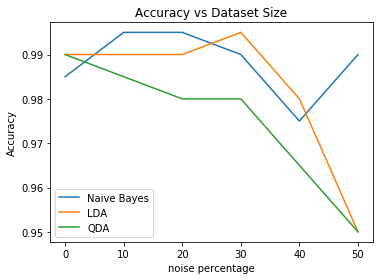

In [194]:
# Plot the accuracy results
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(noise, accuracy_nb, label='Naive Bayes')
plt.plot(noise, accuracy_lda, label='LDA')
plt.plot(noise, accuracy_qda, label='QDA')
plt.xlabel('noise percentage')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Dataset Size')
plt.legend()
plt.tight_layout()
plt.show()
